### load libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    classification_report
)

### prepare data

In [2]:
df=pd.read_csv('data\Obesity Classification.csv')
# Encode categorical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  
df['ObesityCategory'] = label_encoder.fit_transform(df['ObesityCategory'])
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']] 
y = df['ObesityCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### knn implementation

In [3]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        ## Compute distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        #Get labels of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [4]:
knn = KNN(k=14)  
knn.fit(X_train, y_train) 

In [5]:
y_pred = knn.predict(X_test)

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        72
           1       0.96      0.84      0.90        32
           2       0.84      0.94      0.88        65
           3       1.00      0.71      0.83        31

    accuracy                           0.88       200
   macro avg       0.91      0.85      0.87       200
weighted avg       0.88      0.88      0.87       200



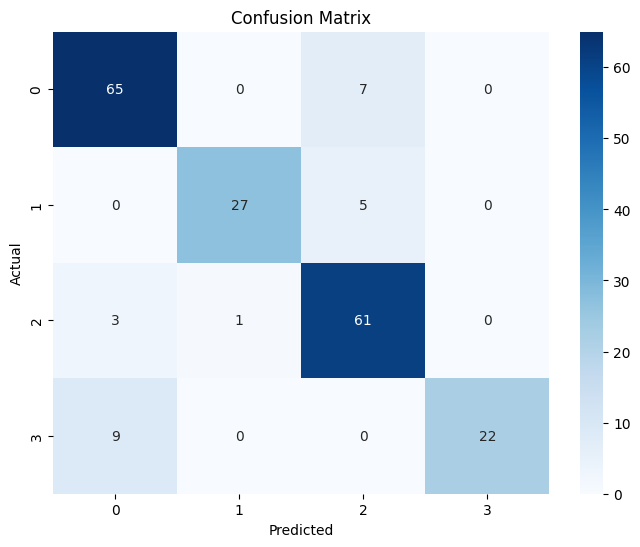

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
